<a href="https://colab.research.google.com/github/jfcoderx/Data-Sciense/blob/main/dropna%2C_map%2C_replace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Malumotlarni tayyorlash haqida

Data Scientist larning deyarli 80% vaqti malumotlarni tozalash, <br>
tayyorlash jarayoni boladi, MODELLASH jarayoniga olib boradigan.

Bu etap juda muhim, siz bunda qanchalik malumotlarni togri, toza <br>
tayyorlagan bolsangiz, MODELINGIZ ANIQLIGI shunchalik yuqori boladi

Bu etapda biz malumotdagi har qanday kamchilikni bartaraf etishimiz kerak<br> boladi, qolib ketgan va tushib qolgan malumotlarni ornini toldirishimiz kerak 

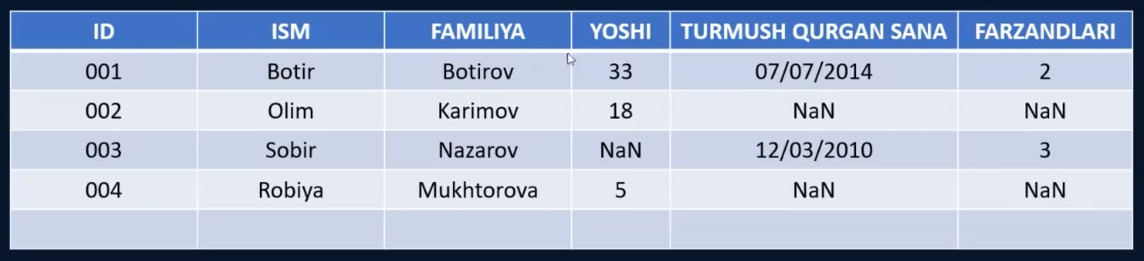

Odatta jadvallarda **NAN (NOT A NUMBER)** qiymatini uchratamiz.

PANDAS DataFramelar mavjud bo'lmagan sonli qiymatlar o'rniga NaN (not available - mvajud emas)<br>
degan qiymatni qo'yib ketadi va statistik ma'lumotlarni chiqarishda bunday qiymatlarni<br> inobatga olmaydi.




**Nega qiymat yoq:**<br>
1. Mavjud emas<br>
002 ID OLim 18 yosh bolgani uchun hali uylanmagan shu uchun Turmush qurgan sanasi NAN,<br> tabiyki farzandlari NAN, biz buni orniga qandaydir nol degan standart qiymatni qoyib ketishimiz<br>
mumkin boladi

2. Yozib olinmagan, tushib qolgan<br>
Turli sabablar tufayli bolishi mumkin, inson omili tufayli bolishi texnik nozokliklar tufayli vahakazo.<br> 003 ID Sobir yoshi NAN demak nimadir sabab tufayli kiritilmagan




Bularga qanday yechim beramiz:<br>
Malumotlar bilan ishlaganda, malumotlarni ornini toldirishda, ularga ishlov berishda, <br>
universal yechim yoq, yani bu narsa sizni muhandis sifatida mantiqiy, kreativ,<br> noodatiy fikrlashingizga topqirligingizga bogliq boladi


Bu turli malumotlar uchun turlicha boladi.<br>
Qandaydir malumotlarni ornini toldirish mumkin<br>
Qandaydir malumotlarni ornini toldirib bolmaydi


<br>

### NAN bilan ishlash: / dropna()

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/automobile_data_nan.csv", index_col=0)

In [4]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0


In [5]:
# NaNlarni koraylik TRUE sifatida

df.isnull()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
81,False,False,False,False,False,False,False,False,False
82,False,False,True,False,True,False,False,False,False
86,False,False,False,True,False,False,False,True,False


sum() dan foydalansak TRUE lar soni hisoblay olamiz:<br>
chunki TRUE ni 1 deb FALSE 0 deb hisoblaydi programma

In [6]:
# NAN larning umumiy soni

df.isnull().sum()

company              0
body-style           0
wheel-base          15
length              13
engine-type         12
num-of-cylinders     0
horsepower          16
average-mileage     15
price                3
dtype: int64

Bularni FOIZ miqdorini ham korsak boladi

In [7]:
df.isnull().sum() * 100 / len(df)

company              0.000000
body-style           0.000000
wheel-base          24.590164
length              21.311475
engine-type         19.672131
num-of-cylinders     0.000000
horsepower          26.229508
average-mileage     24.590164
price                4.918033
dtype: float64

Sonini bildik, nima qilishimiz mumkin?<br>
Agar soni jadvalni soniga nisbatan juda kichik bolsa tashlab <br>
yuborishimiz ham mumkin. Misol 1mln qator, NAN qiymatlari esa 100ta

Tashlab yuborish uchun `dropna()` ni ishlatamiz<br>
Drop NaN --> DropNa()

In [8]:
df.dropna()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
5,audi,sedan,99.8,177.3,ohc,five,110.0,19.0,15250.0
6,audi,wagon,105.8,192.7,ohc,five,110.0,19.0,18920.0
17,chevrolet,hatchback,94.5,155.9,ohc,four,70.0,38.0,6295.0
19,dodge,hatchback,93.7,157.3,ohc,four,68.0,31.0,6377.0
28,honda,sedan,96.5,175.4,ohc,four,101.0,24.0,12945.0
34,jaguar,sedan,113.0,199.6,dohc,six,176.0,15.0,35550.0
37,mazda,hatchback,93.1,159.1,ohc,four,68.0,31.0,6095.0
38,mazda,hatchback,93.1,159.1,ohc,four,68.0,31.0,6795.0


In [10]:
len(df.dropna())

14

Demak 14 qator qoldi 61 qatordan, shunchasini tashlab yuborildi<br>
Bu yaxshi natija emas



`dropna()` orqali NAN bor ustunlarni tashlab yuborishimiz mumkin<br>

**company**              0.000000<br>
**body-style**          0.000000<br>
wheel-base          24.590164<br>
length              21.311475<br>
engine-type         19.672131<br>
**num-of-cylinders**    0.000000<br>
horsepower          26.229508<br>
average-mileage     24.590164<br>
price                4.918033<br>
dtype: float64

In [11]:
df.dropna(axis=1)

,company,body-style,num-of-cylinders
index,,,
0,alfa-romero,convertible,four
1,alfa-romero,convertible,four
2,alfa-romero,hatchback,six
3,audi,sedan,four
4,audi,sedan,five
...,...,...,...
81,volkswagen,sedan,four
82,volkswagen,sedan,four
86,volkswagen,sedan,four


Qatorlar yoki Ustunlarni tashlab<br>
 yuborishni chegaralashamiz mumkin:<br>

`df.dropna(axis=1, thresh=48)`<br>
thresh - chegaralaymiz degani, yani 48tadan <br>
kam bolmagan NANlarni tashlab yubor degani

In [17]:
df.dropna(axis=1, thresh=48)

,company,body-style,length,engine-type,num-of-cylinders,price
index,,,,,,
0,alfa-romero,convertible,168.8,dohc,four,13495.0
1,alfa-romero,convertible,168.8,dohc,four,16500.0
2,alfa-romero,hatchback,171.2,ohcv,six,16500.0
3,audi,sedan,176.6,ohc,four,13950.0
4,audi,sedan,176.6,ohc,five,17450.0
...,...,...,...,...,...,...
81,volkswagen,sedan,171.7,ohc,four,7975.0
82,volkswagen,sedan,171.7,NaN,four,7995.0
86,volkswagen,sedan,NaN,ohc,four,9995.0


In [25]:
df.dropna(thresh=2)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0


*THRESH haqida ANIQ bilim berilmadi, NATIJA xar xil chiqyapti, ozing ozlashtirib ol*

Malum bir ustunni NANlar tekshirib tashlab yuborish uchun:

In [20]:
df.dropna(subset=['price'])

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
5,audi,sedan,99.8,177.3,ohc,five,110.0,19.0,15250.0
6,audi,wagon,105.8,192.7,ohc,five,110.0,19.0,18920.0
9,bmw,sedan,101.2,NaN,ohc,four,NaN,23.0,16430.0
10,bmw,sedan,NaN,176.8,ohc,four,101.0,23.0,16925.0


In [27]:
df.dropna(subset=['price']).shape

(58, 9)

Bunda Price NAN mavjud qatorlarinigina tashlab yubordi, ular 3 dona edi aslida

Ham PRICE qatorini, ham ENGINE-TYPE qatorini NANlardan tozalash

In [21]:
df.dropna(subset=['price', 'engine-type'])

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
5,audi,sedan,99.8,177.3,ohc,five,110.0,19.0,15250.0
6,audi,wagon,105.8,192.7,ohc,five,110.0,19.0,18920.0
9,bmw,sedan,101.2,NaN,ohc,four,NaN,23.0,16430.0
10,bmw,sedan,NaN,176.8,ohc,four,101.0,23.0,16925.0


In [26]:
df.dropna(subset=['price', 'engine-type']).shape

(46, 9)

<br>

### Malumotlarni to'ldirish / fillna()

Qiymatlarni toldirish odatda koproq tavsiya qilinadi

In [28]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0


**1-usul. Barcha NaN larga standart qiymat berish**

Bu (va boshqa) usuldan ko'r-ko'rona emas, mantiqan to'g'ri kelgandagina foydalaniladi. Avvalgi<br>
darsimizdagi misolga qaytadigan bo'lsak, turmush qurmagan odamning nikohdan o'tgan sanasi<br>
bo'lmagan vaqtda, bunday qiymatlarni 0 bilan to'ldirib ketish mumkin.



**Xato ma'lumotlar bilan to'ldirilgan jadval**<br>
**Sun'iy Intellekt dasturingizning xato ishlashiga sabab bo'ladi**

fillna() --> FILL NAN <br>
fillna(0) - barcha NAN qiymatlar o'rniga NOL qiymat bermoqchimiz

In [29]:
df.fillna(0)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,0.0,21.0,13495.0
1,alfa-romero,convertible,0.0,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,0.0,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,0.0,0.0,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,0.0,171.7,0,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,0.0,ohc,four,100.0,0.0,9995.0


Albatta bu universal yo'l emas:<br>
Qachonki sizda NAN ning orniga NOLLAR qulayroq bolganda <br>
ishlatishimiz mumkin. Lekin bunda stringli malumotlar orniga<br>
ham NOL qoyib ketadi, bu esa ishlashni qiyinlashrishi mumkin<br>

Agar har bir ustun uchun alohida standart qiymat bermoqchi bo'lsak,<br>
bir nechta qiymatni lug'at (ustun nomi: qiymat) kor'inishida bershimiz mumkin.

Quyidagi misolda wheel-base va horsepower <br>
ustunlari uchun alohida standart qiymatlar beramiz.

In [30]:
df.fillna({'horsepower': 100, 'wheel-base': 90})

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,100.0,21.0,13495.0
1,alfa-romero,convertible,90.0,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,100.0,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,90.0,171.7,NaN,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0


Bu yerda albatta kreativligizni ishlatishingiz mumkin:

Misol yuqorida yozgan qiymatlarimiz orniga ORTACHA QIYMATLARNI <br>
kiritib ketsak boladi: HORSEPOWER uchun ortacha qiymat:

In [31]:
np.mean(df.horsepower)

108.26666666666667

In [33]:
# df.fillna({'horsepower': 100, 'wheel-base': 90})

df.fillna({'horsepower': np.mean(df['horsepower']), 'wheel-base': np.mean(df['wheel-base'])})

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.600000,168.8,dohc,four,108.266667,21.0,13495.0
1,alfa-romero,convertible,99.219565,168.8,dohc,four,111.000000,21.0,16500.0
2,alfa-romero,hatchback,94.500000,171.2,ohcv,six,154.000000,NaN,16500.0
3,audi,sedan,99.800000,176.6,ohc,four,102.000000,24.0,13950.0
4,audi,sedan,99.400000,176.6,ohc,five,108.266667,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.300000,171.7,ohc,four,85.000000,27.0,7975.0
82,volkswagen,sedan,99.219565,171.7,NaN,four,52.000000,37.0,7995.0
86,volkswagen,sedan,97.300000,NaN,ohc,four,100.000000,NaN,9995.0


Barcha ustunlar uchun ortacha qiymatni qoyib ketmoqchi bolsak:

In [42]:
df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.600000,168.800000,dohc,four,108.297872,21.000000,13495.0
1,alfa-romero,convertible,99.072917,168.800000,dohc,four,111.000000,21.000000,16500.0
2,alfa-romero,hatchback,94.500000,171.200000,ohcv,six,154.000000,25.695652,16500.0
3,audi,sedan,99.800000,176.600000,ohc,four,102.000000,24.000000,13950.0
4,audi,sedan,99.400000,176.600000,ohc,five,108.297872,25.695652,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.300000,171.700000,ohc,four,85.000000,27.000000,7975.0
82,volkswagen,sedan,99.072917,171.700000,NaN,four,52.000000,37.000000,7995.0
86,volkswagen,sedan,97.300000,173.767347,ohc,four,100.000000,25.695652,9995.0


Ozidan oldinki qiymatni qoyib toldirib ketsak boladi<br>
`ffill` -- forward fill

In [34]:
df.fillna(method='ffill')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,21.0,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,102.0,24.0,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100.0,37.0,9995.0


Ozidan keyingi qiymatni qoyib toldirib ketsak boladi<br>
`bfill` -- backward fill

In [35]:
df.fillna(method='bfill')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111.0,21.0,13495.0
1,alfa-romero,convertible,94.5,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,24.0,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,110.0,19.0,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,188.8,ohc,four,100.0,23.0,9995.0


Alohida kompaniya ajratvolib qiymatlarini toldirishimiz mumkin<br>
Sababi bir xil kompaniya mashinalarining qiymatlari ham bir biriga<br>
yaqin bolishi mumkin

In [37]:
df[df.company == 'toyota']

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
66,toyota,hatchback,NaN,158.7,ohc,four,62.0,35.0,5348.0
67,toyota,hatchback,95.7,158.7,NaN,four,NaN,31.0,6338.0
68,toyota,hatchback,NaN,158.7,ohc,four,62.0,31.0,6488.0
69,toyota,wagon,95.7,169.7,ohc,four,62.0,31.0,6918.0
70,toyota,wagon,95.7,NaN,NaN,four,62.0,27.0,7898.0
71,toyota,wagon,95.7,169.7,ohc,four,NaN,27.0,8778.0
79,toyota,wagon,104.5,187.8,dohc,six,156.0,NaN,15750.0


In [39]:
df[df.company == 'toyota'].fillna(method = 'bfill')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
66,toyota,hatchback,95.7,158.7,ohc,four,62.0,35.0,5348.0
67,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6338.0
68,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6488.0
69,toyota,wagon,95.7,169.7,ohc,four,62.0,31.0,6918.0
70,toyota,wagon,95.7,169.7,ohc,four,62.0,27.0,7898.0
71,toyota,wagon,95.7,169.7,ohc,four,156.0,27.0,8778.0
79,toyota,wagon,104.5,187.8,dohc,six,156.0,NaN,15750.0


Bu qiymatlar asosiy dataframega saqlanmayapti, <br>
agar biz toyota malumotlarini saqlab qoymoqchi bolsak

In [40]:
df[df.company == 'toyota'] = df[df.company == 'toyota'].fillna(method = 'bfill')

In [41]:
df[df.company == 'toyota']

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
66,toyota,hatchback,95.7,158.7,ohc,four,62.0,35.0,5348.0
67,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6338.0
68,toyota,hatchback,95.7,158.7,ohc,four,62.0,31.0,6488.0
69,toyota,wagon,95.7,169.7,ohc,four,62.0,31.0,6918.0
70,toyota,wagon,95.7,169.7,ohc,four,62.0,27.0,7898.0
71,toyota,wagon,95.7,169.7,ohc,four,156.0,27.0,8778.0
79,toyota,wagon,104.5,187.8,dohc,six,156.0,NaN,15750.0


Shuningdek<br>
`limit` parametri yordamida aynan nechta NaN qiymatlar ketma-ketligini 
to'ldirishni ham <br>
ko'rsatish mumkin. Tasavvur qiling, biror qatorda 10-20 ta qator qiymatlar yo'q shunday<br>
holatda bularning hammasini emas, boshida 2-3tasini avvalgi qator bilan to'ldirish talab qilinsa<br> 
`df.fillna(method='ffill', limit=2)` deb berish mumkin


Bo'sh qiymatlarni to'ldirishning yana bir usuli ustun uchun o'rta qiymatni olish
hatchback mashinalarini ozini ajratib olib ularga ortacha qiymat yuklashimiz mumkin, sababi bir xil <br>mashinalar qiymatlari ham bir xil bolishi mumkin

In [45]:
dfh = df[df['body-style'] == 'hatchback']
dfh

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
16,chevrolet,hatchback,88.4,141.1,l,three,NaN,47.0,5151.0
17,chevrolet,hatchback,94.5,155.9,ohc,four,70.0,38.0,6295.0
19,dodge,hatchback,93.7,157.3,ohc,four,68.0,31.0,6377.0
20,dodge,hatchback,93.7,NaN,ohc,four,68.0,NaN,6229.0
36,mazda,hatchback,93.1,159.1,NaN,four,NaN,NaN,5195.0
37,mazda,hatchback,93.1,159.1,ohc,four,68.0,31.0,6095.0
38,mazda,hatchback,93.1,159.1,ohc,four,68.0,31.0,6795.0
39,mazda,hatchback,NaN,NaN,NaN,two,101.0,17.0,11845.0


In [46]:
dfh.fillna(dfh.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
2,alfa-romero,hatchback,94.5,171.200,ohcv,six,154.000000,32.727273,16500.000000
16,chevrolet,hatchback,88.4,141.100,l,three,77.363636,47.000000,5151.000000
17,chevrolet,hatchback,94.5,155.900,ohc,four,70.000000,38.000000,6295.000000
19,dodge,hatchback,93.7,157.300,ohc,four,68.000000,31.000000,6377.000000
20,dodge,hatchback,93.7,159.325,ohc,four,68.000000,32.727273,6229.000000
36,mazda,hatchback,93.1,159.100,NaN,four,77.363636,32.727273,5195.000000
37,mazda,hatchback,93.1,159.100,ohc,four,68.000000,31.000000,6095.000000
38,mazda,hatchback,93.1,159.100,ohc,four,68.000000,31.000000,6795.000000
39,mazda,hatchback,94.1,159.325,NaN,two,101.000000,17.000000,11845.000000


<br>

### Takroriy qiymatlarni o'chirish va ozgartirish

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/world_population_duplicates.csv')
df

,rank,country,density,densityMi,pop2021,area
0,1,Macau,21946.4667,56841.3487,658.394,30
1,2,Monaco,19755.5000,51166.7450,39.511,2
2,28,Burundi,440.3044,1140.3884,12255.433,27834
3,1,Macau,21946.4667,56841.3487,658.394,30
4,2,Monaco,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...,...
242,228,Namibia,3.1338,8.1166,2587.344,825615
243,229,Western Sahara,2.3003,5.9577,611.875,266000
244,230,Mongolia,2.1286,5.5129,3329.289,1564110
245,231,Falkland Islands,0.2902,0.7517,3.533,12173


Bizda bazi hollarda qaysidir qatorlar takrorlanib yozib qoyilgan bolishi <br>mumkin: Misol uchun 0, 1 indeks qatorlar bilan 3, 4 indeks qatorlar

Biz bunday qatorlardan voz kechishimiz kerak!<br>
Birinchi orinda bu qatorlarni qanday topamiz:

In [48]:
df.duplicated()

0      False
1      False
2      False
3       True
4       True
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool

Bu funksiya bizga takrorlangan qatorlarni korsatib beradi:<br>
TRUE deb koringani demak takrorlanganligini bildiradi:

Jami takrorlangan qatorlar nechta:

In [49]:
df.shape

(247, 6)

In [50]:
df.duplicated().sum()

15

Demak bizda 247 qatordan 15 tasi takrorlangan ekan.

Biz bu qatorlarni ochirib tashlashimiz kerak. Bizda bor malumorlarni takroriy<br> saqlash ortiqcha joy oladi va dasturimizni ham xato ishlashiga sabab boladi

In [51]:
df.drop_duplicates()

,rank,country,density,densityMi,pop2021,area
0,1,Macau,21946.4667,56841.3487,658.394,30
1,2,Monaco,19755.5000,51166.7450,39.511,2
2,28,Burundi,440.3044,1140.3884,12255.433,27834
5,3,Singapore,8305.1915,21510.4461,5896.686,710
6,4,Hong Kong,6841.3134,17719.0017,7552.810,1104
...,...,...,...,...,...,...
242,228,Namibia,3.1338,8.1166,2587.344,825615
243,229,Western Sahara,2.3003,5.9577,611.875,266000
244,230,Mongolia,2.1286,5.5129,3329.289,1564110
245,231,Falkland Islands,0.2902,0.7517,3.533,12173


Ana endi bizda 232 ta qator qoldi, duplikatlar ochirib tashlandi

drop_duplicated() metodi qanday ishlaydi?<br>
u birinchi qatorni oladi hammasini bilan solishitib chiqadi<br>
keyin ikkinchi qatorni oladi yana solishtirib chiqadi

Lekin bunda bir xil qiymatli malumotlar yana qolishi mumkin<br>
Misol Macau davlatidagi malumotlar, yana kelgan ammo qiymatlari<br>
juda oz miqdorda ozgargan misol 0.01gami, bu malumotlarga <br>
`drop_duplicates()` metodi indamay ketadi

Shunday holatlarda biz aynan qaysi ustun boyicha solishitirishimizni ham aytishimiz mumkin

In [52]:
# yani faqat country ustuni boyicha solishtirib duplicatni tashlab yubor
# agar ikta bir xil davlat chiqsa, qolgan qiymatiga qaramay tashlab yuboradi

df.drop_duplicates(['country'])

,rank,country,density,densityMi,pop2021,area
0,1,Macau,21946.4667,56841.3487,658.394,30
1,2,Monaco,19755.5000,51166.7450,39.511,2
2,28,Burundi,440.3044,1140.3884,12255.433,27834
5,3,Singapore,8305.1915,21510.4461,5896.686,710
6,4,Hong Kong,6841.3134,17719.0017,7552.810,1104
...,...,...,...,...,...,...
242,228,Namibia,3.1338,8.1166,2587.344,825615
243,229,Western Sahara,2.3003,5.9577,611.875,266000
244,230,Mongolia,2.1286,5.5129,3329.289,1564110
245,231,Falkland Islands,0.2902,0.7517,3.533,12173


In [53]:
# ikta ustun boyicha takrorlanishini tekshirib tashlab yuboradi

df.drop_duplicates(['country', 'rank'])

,rank,country,density,densityMi,pop2021,area
0,1,Macau,21946.4667,56841.3487,658.394,30
1,2,Monaco,19755.5000,51166.7450,39.511,2
2,28,Burundi,440.3044,1140.3884,12255.433,27834
5,3,Singapore,8305.1915,21510.4461,5896.686,710
6,4,Hong Kong,6841.3134,17719.0017,7552.810,1104
...,...,...,...,...,...,...
242,228,Namibia,3.1338,8.1166,2587.344,825615
243,229,Western Sahara,2.3003,5.9577,611.875,266000
244,230,Mongolia,2.1286,5.5129,3329.289,1564110
245,231,Falkland Islands,0.2902,0.7517,3.533,12173


<br>

### .map() - qiymatlarni moslash (almashtirish)

In [55]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/automobile_data_nan.csv", index_col=0)

In [56]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0


Biz biror ustunning barchasini qiymatlarini ozgartirmoqchimiz<br>
Odatda hayolga keladigan narsa bu sikl yordamida bajarish

ammo `PANDAS` da biz bularni `MAP` va `APPLY` metodlari yordamida bajarishimiz mumkin

`num-of-cylinders` degan ustun bor, qarasak qiymatlari sonlar orniga harflar <br>bilan yozilgan, biz shu matnlarni songa ozgartiraylik, bizga ishlash uchun <br>sonlar qulay, matnlardan kora

In [58]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

Demak bu ustunda faqatgina shu qiymatlar bor ekan

Boshlanishiga bir shu qiymatlarga mos keluvchi LUGAT yaratamiz:

In [59]:
dict = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}

`df['cylinders'] = df['num-of-cylinders'].map(dict)`<br>
yangi `cylinders` degan ustun yaratyapmiz va unga <br>
`num-of-cylinders` ustunni `.map(dict)` orqali moslashtiramiz



`map()` argumenti `dict` mos ravishda yangi ustunni<br>
eski ustunga moslab qiymatlarini kiritib chiqadi

In [62]:
df['num-of-cylinders'].map(dict)

index
0     4
1     4
2     6
3     4
4     5
     ..
81    4
82    4
86    4
87    4
88    4
Name: num-of-cylinders, Length: 61, dtype: int64

In [60]:
df['cylinders'] = df['num-of-cylinders'].map(dict)

In [61]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders
index,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0,4
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0,4
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0,6
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0,4
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0,5
...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0,4
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0,4
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0,4


price ustuni chiqaraylik:

In [63]:
df.price

index
0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
       ...   
81     7975.0
82     7995.0
86     9995.0
87    12940.0
88    13415.0
Name: price, Length: 61, dtype: float64

Bu dollarda kursi biz esa buni sumdagi kursiga aylantiraylik

In [64]:
kurs = 10100
df['price'].map(lambda x: x * kurs)

index
0     136299500.0
1     166650000.0
2     166650000.0
3     140895000.0
4     176245000.0
         ...     
81     80547500.0
82     80749500.0
86    100949500.0
87    130694000.0
88    135491500.0
Name: price, Length: 61, dtype: float64

Demak map() price ustunining har birini <br>
argumentida korsatilgan holat boyicha ozgartirib chiqdi

Yangi ustun ham qoshishimiz mumkin:

In [65]:
df['price_uz'] = df['price'].map(lambda x: x * kurs)
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders,price_uz
index,,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0,4,136299500.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0,4,166650000.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0,6,166650000.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0,4,140895000.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0,5,176245000.0
...,...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0,4,80547500.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0,4,80749500.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0,4,100949500.0


<br>

### .replace() va .rename() - qiymatlarni almashtirish

Yana bir foydali funksiya - bu replace()<br>
uning yordamizda biror qiymatni boshqasiga oson ozgaritib qoya olamiz

In [66]:
df

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders,price_uz
index,,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0,4,136299500.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0,4,166650000.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0,6,166650000.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0,4,140895000.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0,5,176245000.0
...,...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0,4,80547500.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0,4,80749500.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0,4,100949500.0


In [67]:
df.replace('four', 4)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders,price_uz
index,,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,4,NaN,21.0,13495.0,4,136299500.0
1,alfa-romero,convertible,NaN,168.8,dohc,4,111.0,21.0,16500.0,4,166650000.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,NaN,16500.0,6,166650000.0
3,audi,sedan,99.8,176.6,ohc,4,102.0,24.0,13950.0,4,140895000.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0,5,176245000.0
...,...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,4,85.0,27.0,7975.0,4,80547500.0
82,volkswagen,sedan,NaN,171.7,NaN,4,52.0,37.0,7995.0,4,80749500.0
86,volkswagen,sedan,97.3,NaN,ohc,4,100.0,NaN,9995.0,4,100949500.0


In [68]:
df.replace('six', 6)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders,price_uz
index,,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,NaN,21.0,13495.0,4,136299500.0
1,alfa-romero,convertible,NaN,168.8,dohc,four,111.0,21.0,16500.0,4,166650000.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154.0,NaN,16500.0,6,166650000.0
3,audi,sedan,99.8,176.6,ohc,four,102.0,24.0,13950.0,4,140895000.0
4,audi,sedan,99.4,176.6,ohc,five,NaN,NaN,17450.0,5,176245000.0
...,...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0,4,80547500.0
82,volkswagen,sedan,NaN,171.7,NaN,four,52.0,37.0,7995.0,4,80749500.0
86,volkswagen,sedan,97.3,NaN,ohc,four,100.0,NaN,9995.0,4,100949500.0


Birdaniga bir nechta qiymatlarni almashtirmoqchi bolsak,<br>
unda argumentiga lugat korinishidagi ozgarishlarni kiritsak boladi

In [69]:
dict

{'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'eight': 8,
 'twelve': 12}

In [70]:
df.replace(dict)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,cylinders,price_uz
index,,,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,4,NaN,21.0,13495.0,4,136299500.0
1,alfa-romero,convertible,NaN,168.8,dohc,4,111.0,21.0,16500.0,4,166650000.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154.0,NaN,16500.0,6,166650000.0
3,audi,sedan,99.8,176.6,ohc,4,102.0,24.0,13950.0,4,140895000.0
4,audi,sedan,99.4,176.6,ohc,5,NaN,NaN,17450.0,5,176245000.0
...,...,...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,4,85.0,27.0,7975.0,4,80547500.0
82,volkswagen,sedan,NaN,171.7,NaN,4,52.0,37.0,7995.0,4,80749500.0
86,volkswagen,sedan,97.3,NaN,ohc,4,100.0,NaN,9995.0,4,100949500.0


Bazida bizdan ustun yoki indeks qiymatlarini ozgartirish talab qilinishi mumkin

In [71]:
d = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/world_population_duplicates.csv', index_col='country')
d

,rank,density,densityMi,pop2021,area
country,,,,,
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
Burundi,28,440.3044,1140.3884,12255.433,27834
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
Namibia,228,3.1338,8.1166,2587.344,825615
Western Sahara,229,2.3003,5.9577,611.875,266000
Mongolia,230,2.1286,5.5129,3329.289,1564110


`rename()` aynan ustunlar yoki indekslarning nomini ozgartiruvchi metod hisoblanadi

In [72]:
d.rename(index=str.upper)

,rank,density,densityMi,pop2021,area
country,,,,,
MACAU,1,21946.4667,56841.3487,658.394,30
MONACO,2,19755.5000,51166.7450,39.511,2
BURUNDI,28,440.3044,1140.3884,12255.433,27834
MACAU,1,21946.4667,56841.3487,658.394,30
MONACO,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
NAMIBIA,228,3.1338,8.1166,2587.344,825615
WESTERN SAHARA,229,2.3003,5.9577,611.875,266000
MONGOLIA,230,2.1286,5.5129,3329.289,1564110


In [74]:
d.rename(columns=str.upper)

,RANK,DENSITY,DENSITYMI,POP2021,AREA
country,,,,,
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
Burundi,28,440.3044,1140.3884,12255.433,27834
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
Namibia,228,3.1338,8.1166,2587.344,825615
Western Sahara,229,2.3003,5.9577,611.875,266000
Mongolia,230,2.1286,5.5129,3329.289,1564110


In [75]:
d.rename(index=str.upper, columns=str.upper)

,RANK,DENSITY,DENSITYMI,POP2021,AREA
country,,,,,
MACAU,1,21946.4667,56841.3487,658.394,30
MONACO,2,19755.5000,51166.7450,39.511,2
BURUNDI,28,440.3044,1140.3884,12255.433,27834
MACAU,1,21946.4667,56841.3487,658.394,30
MONACO,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
NAMIBIA,228,3.1338,8.1166,2587.344,825615
WESTERN SAHARA,229,2.3003,5.9577,611.875,266000
MONGOLIA,230,2.1286,5.5129,3329.289,1564110


Aynan bir ustun yoki qatorning nomini ozgartirishimiz mumkin:

In [76]:
d.rename(columns={'pop2021': 'population'})

,rank,density,densityMi,population,area
country,,,,,
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
Burundi,28,440.3044,1140.3884,12255.433,27834
Macau,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
Namibia,228,3.1338,8.1166,2587.344,825615
Western Sahara,229,2.3003,5.9577,611.875,266000
Mongolia,230,2.1286,5.5129,3329.289,1564110


`inplace=True` bilan juda kop malumotlarni ozgartirish ham mumkin:

In [77]:
d.rename(columns={'pop2021': 'population'}, index={'Macau': 'MMMMM'}, inplace=True)
d

,rank,density,densityMi,population,area
country,,,,,
MMMMM,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
Burundi,28,440.3044,1140.3884,12255.433,27834
MMMMM,1,21946.4667,56841.3487,658.394,30
Monaco,2,19755.5000,51166.7450,39.511,2
...,...,...,...,...,...
Namibia,228,3.1338,8.1166,2587.344,825615
Western Sahara,229,2.3003,5.9577,611.875,266000
Mongolia,230,2.1286,5.5129,3329.289,1564110
